In [1]:
# MSDS 434 - Section 55
# Winter '25
# dispatch-predictions - EDA

# Kevin Geidel

from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
file_path = 'data/2025_01_14_hfd_incident_log.xls'

df = pd.read_excel(file_path, parse_dates=[['Date', 'Alarm']])

df.head()  # Raw data frame

,Date_Alarm,FDID,Incident#,Num,Address,Suite,Zip,Type,Lgth
0,01/02/2000 13:41,14013.0,2000-000001,10,BARBARA LA.,,12590,Natural vegetation fire,0.0
1,01/04/2000 12:30,14013.0,2000-000002,2015,ROUTE 9 - UNIT 16,,12590,Emergency medical service (EMS) Incident,0.5
2,01/04/2000 12:36,14013.0,2000-000003,52,OSBORNE HILL RD.,,12590,Emergency medical service (EMS) Incident,0.7
3,01/05/2000 22:13,14013.0,2000-000004,NaN,NEW HAMBURG RD. @ WHEELER,,12590,"Service call, other",1.0
4,01/07/2000 22:34,14013.0,2000-000005,206,OLD HOPEWELL RD.,,12590,"Good intent call, other",0.3


In [3]:
# stats on the raw dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16172 entries, 0 to 16171
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_Alarm  16172 non-null  object 
 1   FDID        15483 non-null  float64
 2   Incident#   15483 non-null  object 
 3   Num         13410 non-null  object 
 4   Address     15482 non-null  object 
 5   Suite       15437 non-null  object 
 6   Zip         15468 non-null  object 
 7   Type        16148 non-null  object 
 8   Lgth        15483 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [4]:
# 689 records (16172 - 15483) don't have dates, incident #s or times.
# This looks like a issue with exporting certain call types 
# (maybe there was a newline char in the text?)
# drop records w/o dates

df = df.dropna(subset=['Incident#'])

# Coax cols into proper dtypes
df['FDID'] = df['FDID'].astype(str)
df['Date_Alarm'] = df['Date_Alarm'].astype('datetime64[s]')

# Repair the broken Type
broken_type = 'Unintentional system/detector operation (no '
df.loc[df['Type']==broken_type, 'Type'] = broken_type + 'fire)'

# re-check breakdown of rows/cols
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15483 entries, 0 to 16171
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype        
---  ------      --------------  -----        
 0   Date_Alarm  15483 non-null  datetime64[s]
 1   FDID        15483 non-null  object       
 2   Incident#   15483 non-null  object       
 3   Num         13410 non-null  object       
 4   Address     15482 non-null  object       
 5   Suite       15437 non-null  object       
 6   Zip         15468 non-null  object       
 7   Type        15459 non-null  object       
 8   Lgth        15483 non-null  float64      
dtypes: datetime64[s](1), float64(1), object(7)
memory usage: 1.2+ MB


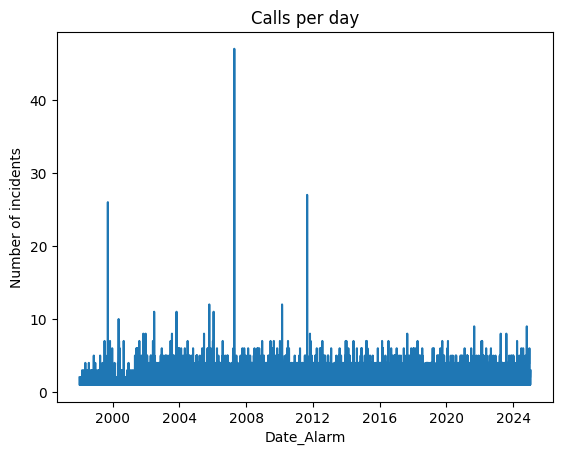

In [5]:
# Visualize the data

# Group by date
calls_per_day = df['Date_Alarm'].groupby([df['Date_Alarm'].dt.date]).count()

calls_per_day.plot.line()
plt.title("Calls per day")
plt.ylabel("Number of incidents")
plt.show()

In [6]:
calls_per_day.describe()

count    7471.000000
mean        2.072413
std         1.393897
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        47.000000
Name: Date_Alarm, dtype: float64

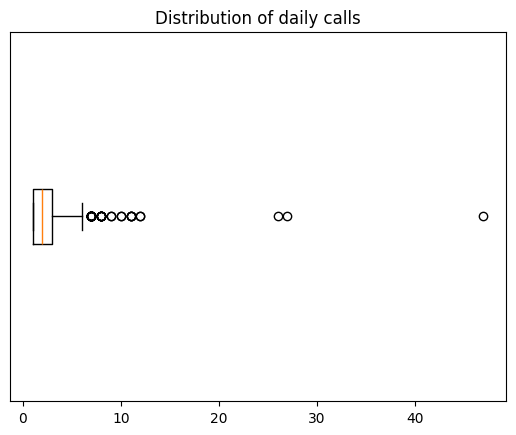

In [7]:
# view the distribution of calls per day

plt.boxplot(calls_per_day, orientation='horizontal');
plt.title("Distribution of daily calls")
plt.yticks([]);

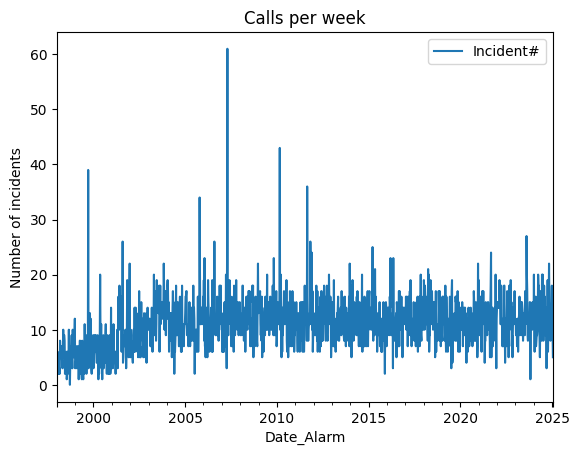

In [8]:
# Try again by week

calls_per_week = df[['Date_Alarm', 'Incident#']].groupby([pd.Grouper(key='Date_Alarm', freq='W')]).count()

calls_per_week.plot.line()
plt.title("Calls per week")
plt.ylabel("Number of incidents")
plt.show()

In [9]:
calls_per_week.describe()

,Incident#
count,1412.000000
mean,10.965297
std,4.714327
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,61.000000


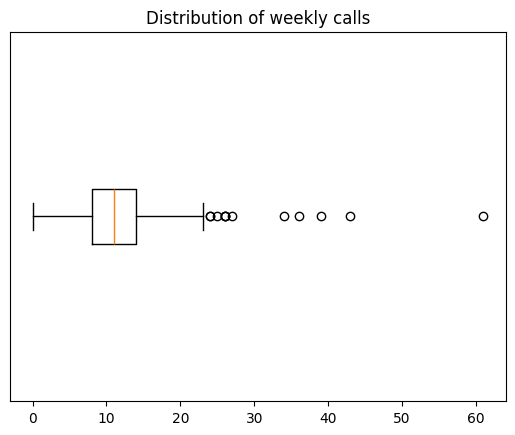

In [10]:
plt.boxplot(calls_per_week, orientation='horizontal');
plt.title("Distribution of weekly calls")
plt.yticks([]);